In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import numpy as np
import math
# from generate_geoshape import *

In [15]:
N = 200
thick = 0.1
bound = 5.0
rad = 2.0
noise_dist = 'uniform'
period = 5

In [16]:
# pos = sim_shapes(bound, N, rad, thick, period, noise_dist='uniform')

In [40]:
def circle(N, rad, thick, period, noise_dist):
    if noise_dist == 'uniform':
        noise = np.random.uniform(-thick / 2., thick / 2., N)
    elif noise_dist == 'gaussian':
        noise = np.random.normal(0.0, thick, (2, N))
    else:
        print('error : noise distribution undefined...either uniform or gaussian')
        return None
    
    angles = np.linspace(0, period * 2 * math.pi, int(N / period))
    x = np.cos(angles) * rad
    y = np.sin(angles) * rad
    pos = np.concatenate((x[None,:], y[None, :]), 0)
    pos = np.tile(pos, period) + noise
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(1,1,1)
    ax.scatter(pos[0], pos[1])
    ax.set_xlim([-3,3])
    ax.set_ylim([-3,3])
    return pos

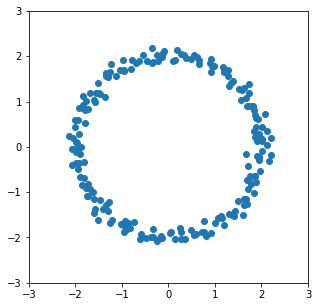

In [41]:
pos = circle(N, rad, thick, period, noise_dist='gaussian')
np.save('circles/obs.npy', pos)

In [25]:
def sim_cirlces(num_seqs, N, rad, thick, period, noise_dist):
    Pos = np.zeros((num_seqs, 2, N))
    Mus = np.zeros((num_seqs, 2))
    Rads = np.zeros(num_seqs)
    for i in range(num_seqs):
        pos = circle(N, rad, thick, period, noise_dist)
        mu = np.random.uniform(-2, 2, 2)
        Pos[i] = mu[:, None] + pos
        Mus[i] = mu
        Rads[i] = rad
        fig = plt.figure(figsize=(5,5))
        ax = fig.add_subplot(1,1,1)
        ax.scatter(Pos[i, 0], Pos[i,1])
        ax.set_xlim([-3,3])
        ax.set_ylim([-3,3])
    return Pos, Mus, Rads

In [7]:
# num_seqs = 20
# Pos, Mus, Rads = sim_cirlces(num_seqs, N, rad, thick, period, noise_dist='uniform')
# np.save('circles/obs.npy', Pos)
# np.save('circles/mus.npy', Mus)
# np.save('circles/rads.npy', Rads)

In [8]:
def square(N, rad, thick, period, noise_dist):
    if noise_dist == 'uniform':
        noise = np.random.uniform(-thick / 2., thick / 2., N)
    elif noise_dist == 'gaussian':
        noise = np.random.normal(0.0, thick, (2, N))
    else:
        print('error : noise distribution undefined...either uniform or gaussian')
        return None
    rotate = np.array([[np.cos(math.pi/4.), - np.sin(math.pi/4.)], [np.sin(math.pi/4.), np.cos(math.pi/4.)]])
    
    pts_edge = int((N / period) / 4.)
    bottom_x = np.linspace(-rad, rad, pts_edge)
    bottom_y = np.ones(pts_edge) * (-rad)
    
    left_x = np.ones(pts_edge) * (-rad)
    left_y = np.linspace(-rad, rad, pts_edge)
    
    top_x = np.linspace(-rad, rad, pts_edge)
    top_y = np.ones(pts_edge) * (rad)
 
    right_x = np.ones(pts_edge) * (rad)
    right_y = np.linspace(-rad, rad, pts_edge)


    x = np.concatenate((bottom_x, left_x, top_x, right_x), 0)
    y = np.concatenate((bottom_y, left_y, top_y, right_y), 0)
    x = np.tile(x, period)
    y = np.tile(y, period)
    pos = np.concatenate((x[None,:], y[None, :]), 0) + noise
#     pos = np.dot(rotate, pos)
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(1,1,1)
    ax.scatter(pos[0], pos[1])
    ax.set_xlim([-3,3])
    ax.set_ylim([-3,3])
    return pos

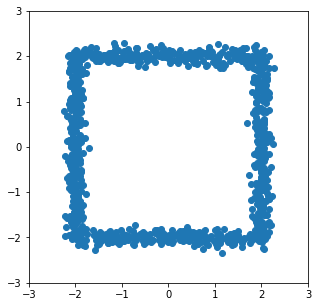

In [76]:
N = 1000
period = 5
pos = square(N, rad, thick, period, noise_dist='gaussian')
np.save('squares/obs.npy', pos)

(-3, 3)

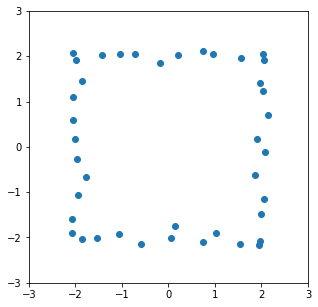

In [41]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.scatter(pos[0, :40], pos[1, :40])
ax.set_xlim([-3,3])
ax.set_ylim([-3,3])

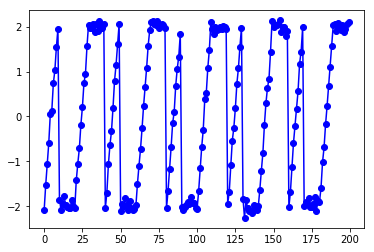

In [38]:
plt.plot(pos[0], 'b-o')

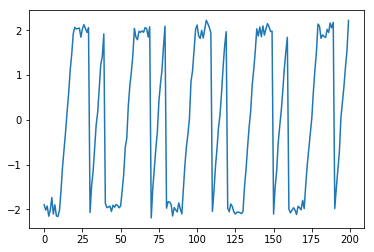

In [39]:
plt.plot(pos[1])

In [10]:
def sim_squares(num_seqs, N, rad, thick, period, noise_dist='uniform'):
    Pos = np.zeros((num_seqs, 2, N))
    Mus = np.zeros((num_seqs, 2))
    Rads = np.zeros(num_seqs)
    for i in range(num_seqs):
        pos = square(N, rad, thick, period, noise_dist='uniform')
        mu = np.random.uniform(-2, 2, 2)
        Pos[i] = mu[:, None] + pos
        Mus[i] = mu
        Rads[i] = rad
#         fig = plt.figure(figsize=(5,5))
#         ax = fig.add_subplot(1,1,1)
#         ax.scatter(Pos[i, 0], Pos[i,1])
#         ax.set_xlim([-3,3])
#         ax.set_ylim([-3,3])
    return Pos, Mus, Rads

# num_seqs = 1000
# Pos, Mus, Rads = sim_squares(num_seqs, N, rad, thick, period, noise_dist='uniform')
# np.save('squares/obs.npy', Pos)
# np.save('squares/mus.npy', Mus)
# np.save('squares/rads.npy', Rads)

In [11]:
# pos = square(N, rad, thick, period, noise_dist='uniform')

In [9]:
def cross(N, rad, thick, period, noise_dist='uniform'):
    if noise_dist == 'uniform':
        noise = np.random.uniform(-thick / 2., thick / 2., N)
    elif noise_dist == 'gaussian':
        noise = np.random.normal(0.0, thick, (2, N))
    else:
        print('error : noise distribution undefined...either uniform or gaussian')
        return None
    
    rotate = np.array([[np.cos(math.pi/4.), - np.sin(math.pi/4.)], [np.sin(math.pi/4.), np.cos(math.pi/4.)]])
    pts_edge = int((N / period) / 2.)
    vertical_x = np.zeros(pts_edge)
    vertical_y = np.linspace(-rad, rad, pts_edge)
    
    horizontal_y = np.zeros(pts_edge)
    horizontal_x = np.linspace(-rad, rad, pts_edge)

    
    x = np.concatenate((vertical_x, horizontal_x), 0)
    y = np.concatenate((vertical_y, horizontal_y), 0)
    pos = np.concatenate((x[None, :], y[None, :]), 0)
    pos = np.dot(rotate, pos) 
    pos = np.tile(pos, (1, period)) + noise
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(1,1,1)
    ax.scatter(pos[0], pos[1])    
    return pos

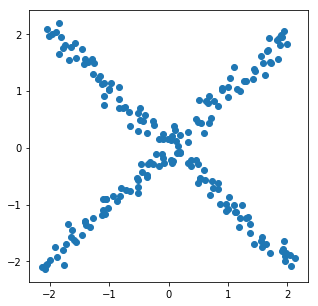

In [10]:
N = 200
period = 5
pos = cross(N, rad* np.sqrt(2), thick, period, noise_dist='gaussian')
np.save('crosses/obs.npy', pos)

In [6]:
def triangle(N, rad, thick, period, noise_dist='uniform'):
    if noise_dist == 'uniform':
        noise = np.random.uniform(-thick / 2., thick / 2., N)
    elif noise_dist == 'gaussian':
        noise = np.random.normal(0.0, thick, (2, N))
    else:
        print('error : noise distribution undefined...either uniform or gaussian')
        return None
    
    right_rotate = np.array([[np.cos(math.pi/6.), - np.sin(math.pi/6.)], [np.sin(math.pi/6.), np.cos(math.pi/6.)]])
    left_rotate = np.array([[np.cos(math.pi/6.), np.sin(math.pi/6.)], [- np.sin(math.pi/6.), np.cos(math.pi/6.)]])
    
    pts_edge = int((N / period ) / 3.)
    bottom_x = np.linspace(-rad, rad, pts_edge)
    bottom_y = np.zeros(pts_edge)
    bottom_pos = np.concatenate((bottom_x[None, :], bottom_y[None, :]), 0)
    
    left_x = np.zeros(pts_edge)
    left_y = np.linspace(0, 2*rad, pts_edge)
    left_pos = np.concatenate((left_x[None, :], left_y[None, :]), 0)
    left_pos = np.dot(left_rotate, left_pos)
    left_pos[0] = left_pos[0] - rad
    
    right_x = np.zeros(pts_edge)
    right_y = np.linspace(0, 2*rad, pts_edge)
    right_pos = np.concatenate((right_x[None, :], right_y[None, :]), 0)
    right_pos = np.dot(right_rotate, right_pos) 
    right_pos[0] = right_pos[0] + rad

    pos = np.concatenate((bottom_pos, right_pos, np.flip(left_pos, -1)), -1)
    pos = np.tile(pos, (1, period))
    pos[1] = pos[1] - rad * np.sqrt(3) /2 
    pos = pos + noise
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(1,1,1)
    ax.scatter(pos[0], pos[1])  
    return pos

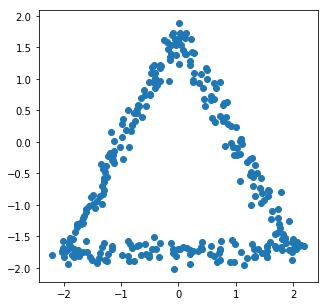

In [7]:
N = 300
period = 5
pos = triangle(N, rad, thick, period, noise_dist='gaussian')
np.save('triangles/obs.npy', pos)

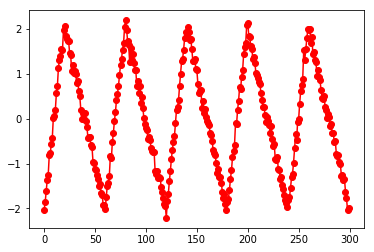

In [8]:
plt.plot(pos[0], 'r-o')

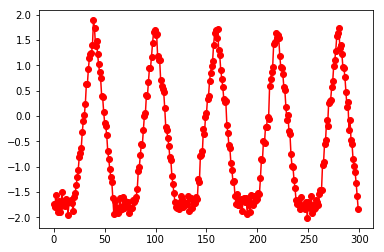

In [9]:
plt.plot(pos[1], 'r-o')